Importation des bibliothèques
Pandas pour gérer l'importation
Spacy pour faire le nettoyage
en_core_web_sm pour gérer la bibliothèque de mot en anglais
Wordcloud pour créer un nuage de mot
Matplot pour créer des graphiques
CountVectorizer a la même fonction que Spacy, je la garde au cas où avec une fonction particulière pour vectoriser a nouveau
Time pour gérer le temps
TextBlob pour voir la polarité (methode .sentiment)

En cas de besoin
#pip install spacy
#python -m spacy download en_core_web_sm

Reste à faire sur le pre-process : 
- Vérification de la distribution des commentaires (si cela suit la loi de bernoulli on peut prendre le bernoulli naive bayse) mais on peut également prendre que N élément du dataset en toute confiance
- Voir l'utilité des N-gram (sinon on passe au TF-IDF pour réduire la fréquence des mots comme use)
- Voir si on prend les ADC également au risque d'aloudir et de bruiter le corpus nlp
- utilité de passer au NLTK pour voir la différence avec SPACY (voir combiner les deux)
- Essayer éventuellement le stem au lieu du lemma

Priorité : 
- Voir le résultat d'un NB sur le dataset initial puis le clean ?

Tâche suivante : 
- Exécuter tt les classifier
- Voir le besoin ou non de boosting
- executer un vote classifier (méthode utilisant le pipeline ?)


In [1]:
import pandas as pd
import re
import spacy
import en_core_web_sm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from time import time
import numpy as np
from textblob import TextBlob

In [2]:
aws = pd.read_csv("pr_10k.csv",sep=";",header=0)

In [3]:
print(aws.head(10))
print(aws.dtypes)
print(aws.info())
print(aws.describe())

                                                name  \
0                Annas Dream Full Quilt with 2 Shams   
1  Stop Pacifier Sucking without tears with Thumb...   
2  Stop Pacifier Sucking without tears with Thumb...   
3  Stop Pacifier Sucking without tears with Thumb...   
4            A Tale of Baby's Days with Peter Rabbit   
5  Baby Tracker&reg, - Daily Childcare Journal, S...   
6  Baby Tracker&reg, - Daily Childcare Journal, S...   
7  Baby Tracker&reg, - Daily Childcare Journal, S...   
8  Baby Tracker&reg, - Daily Childcare Journal, S...   
9  Baby Tracker&reg, - Daily Childcare Journal, S...   

                                              review sentiment  
0  Very soft and comfortable and warmer than it l...  positive  
1  This is a product well worth the purchase.  I ...  positive  
2  All of my kids have cried non-stop when I trie...  positive  
3  When the Binky Fairy came to our house, we did...  positive  
4  Lovely book, it's bound tightly so you may not...  posi

In [4]:
print(aws.groupby(['sentiment']).count())

           name  review
sentiment              
negative   2111    2107
positive   7885    7869


In [4]:
aws = aws.drop(['name'],axis=1)
aws =aws.dropna()

In [5]:
aws['clean review'] = aws['review'].str.lower()

In [6]:
nlp = en_core_web_sm.load()
t=time()
aws['clean review'] = aws['clean review'].apply(nlp)
t1=time()
print("NLP : " + str(t1-t))

NLP : 208.94311785697937


In [30]:
#test
#Gérer l'émoticone
print(aws.iloc[32,2])
print(' ')
#Rien de spécial
print(aws.iloc[217,2])
print(' ')
#Commentaire négatif mais cela ne ressort pas clairement a part peut être maybe
print(aws.iloc[218,2])
print(' ')
#Commentaire intéressant car il mèle négatif et positif alors que le tag est positif
print(aws.iloc[424,2])
print(' ')
#Overprice est interessant dans ce commentaire négatif mais également les chiffres et les symboles
print(aws.iloc[547,2])
print(' ')
#Que des chiffres
print(aws.iloc[1288,2])
print(' ')

my son likes brushing elmo's teeth. almost too nice of a book to let the kids play with haha :)
 
my 10 month old grandson thought the movement of this toy was funny! he laughs when it moves! saying this, he does put it in his mouth but pulls it out to laugh so, i love this teether because it makes him so happy not because it massages his teeth!
 
my four month old started teething around two months, he has pretty impressive motor skills when it comes to using his hands but this teether is huge and you really have to apply quite a bit of pressure for it to vibrate. my other son who is two and also teething shows absolutely no intrest in this at all. maybe in a couple more months....
 
i highly recommend this item.  it is a must!  i registered for the diaper genie and used it for about a week and couldn't stand it.  it broke,the refills are expensive and very hard to install.  then i got the diaper champ.  what a difference.  easy to use, just one hand, and no odors.  it uses just your 

In [7]:
keep=['VERB','ADJ','ADV']
stopwords = spacy.lang.en.stop_words.STOP_WORDS
t=time()
aws['Lemma'] = aws['clean review'].apply(lambda x:[token.lemma_ for token in x])
aws['Pos'] = aws['clean review'].apply(lambda x:[token.pos_ for token in x])
aws['clean review'] = aws['clean review'].apply(lambda x:[token.lemma_ for token in x if token.lemma_.isalpha() and token.pos_ in keep and token not in stopwords])
t1=time()
print("Token :" +str(t1-t))

Token :2.168907642364502


In [ ]:
print(stopword)

In [9]:
#test
print(aws.head())
print(' ')
#Gérer l'émoticone
print(aws.iloc[32,2])
print(aws.iloc[32,1])
print(' ')
#Rien de spécial
print(aws.iloc[217,2])
print(aws.iloc[217,1])
print(' ')
#Commentaire négatif mais cela ne ressort pas clairement a part peut être maybe
print(aws.iloc[218,2])
print(aws.iloc[218,1])
print(' ')
#Commentaire intéressant car il mèle négatif et positif alors que le tag est positif
print(aws.iloc[424,2])
print(aws.iloc[424,1])
print(' ')
#Overprice est interessant dans ce commentaire négatif mais également les chiffres et les symboles
print(aws.iloc[547,2])
print(aws.iloc[547,1])
print(' ')
#Que des chiffres
print(aws.iloc[1288,2])
print(aws.iloc[1288,1])
print(len(aws.iloc[1288,2]))
print(' ')
print(aws.info())
print(' ')


                                              review sentiment  \
0  Very soft and comfortable and warmer than it l...  positive   
1  This is a product well worth the purchase.  I ...  positive   
2  All of my kids have cried non-stop when I trie...  positive   
3  When the Binky Fairy came to our house, we did...  positive   
4  Lovely book, it's bound tightly so you may not...  positive   

                                        clean review  \
0  [soft, comfortable, warm, look, fit, full, rec...   
1  [worth, find, positive, ingenious, lose, love,...   
2  [cry, non, -, stop, try, ween, find, love, eas...   
3  [come, special, help, explain, important, stop...   
4  [lovely, bind, able, add, designate, purchase,...   

                                               Lemma  \
0  [very, soft, and, comfortable, and, warm, than...   
1  [this, be, a, product, well, worth, the, purch...   
2  [all, of, -PRON-, kid, have, cry, non, -, stop...   
3  [when, the, binky, fairy, come, to, -PR

In [8]:
aws['len'] = aws['clean review'].apply(lambda x : len(x))
aws['empty']= aws['clean review'].apply(lambda x : bool(len(x) == 0))


print(aws.iloc[1288])
print(' ')
print(aws.groupby(['empty']).count())
print(' ')
print(aws.loc[aws['empty'] == True])


review          &#1047,&#1072,&#1084,&#1077,&#1095,&#1072,&#10...
sentiment                                                positive
clean review                                                   []
Lemma           [&, #, 1047,&#1072,&#1084,&#1077,&#1095,&#1072...
Pos             [CCONJ, PROPN, PROPN, PUNCT, CCONJ, PROPN, PRO...
len                                                             0
empty                                                        True
Name: 1294, dtype: object
 
       review  sentiment  clean review  Lemma   Pos   len
empty                                                    
False    9969       9969          9969   9969  9969  9969
True        7          7             7      7     7     7
 
                                                 review sentiment  \
246                            A favorite in our house!  positive   
1294  &#1047,&#1072,&#1084,&#1077,&#1095,&#1072,&#10...  positive   
1492                                    Big pak N play.  positive   


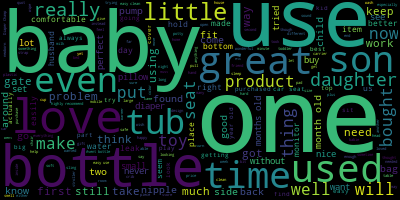

In [14]:
#Générer une longue chaine de caractère
s = " "
long_string = s.join(aws['review'])

#Générer un nuage de mot
wordcloud = WordCloud()
wordcloud.generate(long_string)

#Visualiser le nuage
wordcloud.to_image()


In [9]:
#Transformer clean review en chaine de caractère
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele + " "   
    
    # return string   
    return str1 

aws['clean review'] = aws['clean review'].apply(lambda x: listToString(x))

In [ ]:
Générer un nuage de mot après nettoyage

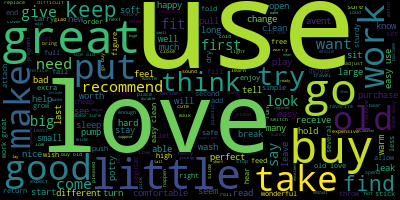

In [26]:
#Générer une longue chaine de caractère
s = " "
clean_string = s.join(aws['clean review'])

#Générer un nuage de mot
wordcloud = WordCloud()
wordcloud.generate(clean_string)

#Visualiser le nuage
wordcloud.to_image()


In [9]:
#Visualisation des mots les plus communs
def plot_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('Mots')
    plt.ylabel('Fréquence')
    plt.title('Les 30 mots les plus communs')
    plt.show()



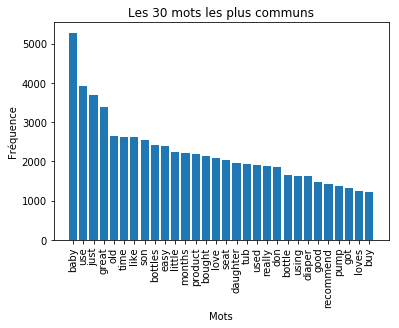

In [10]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform 
count_data = count_vectorizer.fit_transform(aws['review'])

# Visualise
plot_most_common_words(count_data, count_vectorizer)

Visualisation des mots les plus communs après nettoyage

In [11]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform 
count_data = count_vectorizer.fit_transform(aws['clean review'])

# Visualise
plot_most_common_words(count_data, count_vectorizer)

AttributeError: 'list' object has no attribute 'lower'

In [28]:
vect = CountVectorizer()
vect.fit(aws['clean review'])
test= vect.transform(aws['clean review'])
my_array = test.toarray()
test_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
print(test_df.head())
print(test_df.loc[test_df.zippered == 1])
print(' ')
print(aws.iloc[5441,2])
print(' ')

   100th  10lbs  10th  10wks  120ml  14hr  15th  16mo  16th  18mo  ...  ze  \
0      0      0     0      0      0     0     0     0     0     0  ...   0   
1      0      0     0      0      0     0     0     0     0     0  ...   0   
2      0      0     0      0      0     0     0     0     0     0  ...   0   
3      0      0     0      0      0     0     0     0     0     0  ...   0   
4      0      0     0      0      0     0     0     0     0     0  ...   0   

   zealous  zip  ziplock  zipper  zippered  zippy  ziptie  zone  zoom  
0        0    0        0       0         0      0       0     0     0  
1        0    0        0       0         0      0       0     0     0  
2        0    0        0       0         0      0       0     0     0  
3        0    0        0       0         0      0       0     0     0  
4        0    0        0       0         0      0       0     0     0  

[5 rows x 5805 columns]
      100th  10lbs  10th  10wks  120ml  14hr  15th  16mo  16th  18mo  ... 

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Columns: 5805 entries, 100th to zoom
dtypes: int64(5805)
memory usage: 441.8 MB


In [30]:
print(vect.get_feature_names())

['100th', '10lbs', '10th', '10wks', '120ml', '14hr', '15th', '16mo', '16th', '18mo', '1st', '1yo', '1yr', '24th', '29th', '2ce', '2nd', '2yo', '2yr', '30th', '31wks', '32nd', '33rd', '34', '3mo', '3pk', '3rd', '3yo', '41', '4qt', '4th', '4yo', '50th', '51', '5th', '5wk', '5yr', '6ib', '6th', '7th', '8217', '87th', '89th', '8yr', '90th', '99', '99graco', '99th', '9th', 'aaaaarrrrggghhhh', 'abandon', 'abate', 'abdominal', 'abide', 'abilitie', 'able', 'ablt', 'abnormal', 'aborb', 'abottle', 'about', 'above', 'abrasive', 'absent', 'absolute', 'absolutely', 'absolutelylove', 'absorb', 'absorbant', 'absorbent', 'absorbing', 'abstract', 'absurd', 'abthe', 'abundant', 'abuse', 'abused', 'acccessible', 'accent', 'accept', 'acceptable', 'accepting', 'accesible', 'accesorize', 'access', 'accessible', 'accidental', 'accomadate', 'accomanie', 'accomidate', 'accommodate', 'accomodate', 'accomodating', 'accompany', 'accomplish', 'accomplished', 'accord', 'accorde', 'accordian', 'account', 'accross', 

In [15]:
def dict_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:300]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    
    return (count_dict)

In [17]:
dict_common_words(count_data, count_vectorizer)

[('use', 7077.0),
 ('love', 3778.0),
 ('buy', 3639.0),
 ('great', 3278.0),
 ('old', 3037.0),
 ('easy', 2842.0),
 ('make', 2524.0),
 ('work', 2380.0),
 ('good', 2306.0),
 ('little', 2128.0),
 ('try', 1838.0),
 ('think', 1714.0),
 ('recommend', 1676.0),
 ('like', 1552.0),
 ('need', 1455.0),
 ('come', 1381.0),
 ('look', 1305.0),
 ('want', 1254.0),
 ('fit', 1222.0),
 ('purchase', 1196.0),
 ('big', 1194.0),
 ('clean', 1159.0),
 ('say', 1111.0),
 ('warm', 1067.0),
 ('sit', 1063.0),
 ('know', 1039.0),
 ('small', 1016.0),
 ('hold', 1007.0),
 ('play', 943.0),
 ('start', 922.0),
 ('change', 888.0),
 ('new', 888.0),
 ('sleep', 872.0),
 ('nice', 810.0),
 ('leak', 805.0),
 ('open', 788.0),
 ('comfortable', 781.0),
 ('able', 773.0),
 ('help', 753.0),
 ('perfect', 730.0),
 ('different', 699.0),
 ('hard', 695.0),
 ('worth', 695.0),
 ('happy', 677.0),
 ('feel', 673.0),
 ('turn', 665.0),
 ('wash', 638.0),
 ('avent', 626.0),
 ('read', 619.0),
 ('sure', 609.0),
 ('large', 574.0),
 ('fall', 542.0),
 ('soft

In [13]:
aws['polarity_Subjectivity'] = aws['clean review'].apply(lambda x: TextBlob(x).sentiment)
print(aws.head())

                                              review sentiment  \
0  Very soft and comfortable and warmer than it l...  positive   
1  This is a product well worth the purchase.  I ...  positive   
2  All of my kids have cried non-stop when I trie...  positive   
3  When the Binky Fairy came to our house, we did...  positive   
4  Lovely book, it's bound tightly so you may not...  positive   

                                        clean review  \
0  soft comfortable warm look fit full recommend ...   
1  worth find positive ingenious lose love much g...   
2  cry non - stop try ween find love easy work al...   
3  come special help explain important stop use g...   
4  lovely bind able add designate purchase list n...   

                                               Lemma  \
0  [very, soft, and, comfortable, and, warm, than...   
1  [this, be, a, product, well, worth, the, purch...   
2  [all, of, -PRON-, kid, have, cry, non, -, stop...   
3  [when, the, binky, fairy, come, to, -PR

In [38]:
#test de polarité / subjectivité
#Gérer l'émoticone
print(aws.iloc[32,2])
print(aws.iloc[32,7])
print(' ')
#Rien de spécial
print(aws.iloc[217,2])
print(aws.iloc[217,7])
print(' ')
#Commentaire négatif mais cela ne ressort pas clairement a part peut être maybe
print(aws.iloc[218,2])
print(aws.iloc[218,7])
print(' ')
#Commentaire intéressant car il mèle négatif et positif alors que le tag est positif
print(aws.iloc[424,2])
print(aws.iloc[424,7])
print(' ')
#Overprice est interessant dans ce commentaire négatif mais également les chiffres et les symboles
print(aws.iloc[547,2])
print(aws.iloc[547,7])
print(' ')



like nice let play 
Sentiment(polarity=0.6, subjectivity=1.0)
 
old think funny laugh move say put pull laugh love make happy massage 
Sentiment(polarity=0.375, subjectivity=0.5)
 
old start teethe impressive come use huge apply vibrate other teethe show intr more 
Sentiment(polarity=0.37500000000000006, subjectivity=0.595)
 
recommend register use could stand break expensive hard install get easy use use basic tall go buy special 
Sentiment(polarity=-0.00023809523809524834, subjectivity=0.5542857142857143)
 
pay buy overpriced wish research little more 
Sentiment(polarity=0.15625, subjectivity=0.5)
 
